## Business Understanding
You may have some experience of travelling to and from the airport. Have you ever used Uber
or any other cab service for this travel? Did you at any time face the problem of cancellation by
the driver or non-availability of cars?
Well, if these are the problems faced by customers, these very issues also impact the business
of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its
revenue.
As an analyst, you decide to address the problem Uber is facing - driver cancellation and
non-availability of cars leading to loss of potential revenue.
## Business Objectives
The aim of analysis is to identify the root cause of the problem (i.e. cancellation and
non-availability of cars) and recommend ways to improve the situation. As a result of your
analysis, you should be able to present to the client the root cause(s) and possible hypotheses
of the problem(s) and recommend ways to improve them.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [4]:
uber_df=pd.read_csv("E:/Manish/Projects/Uber Analysis/Uber Request Data.csv",index_col=0)

In [5]:
uber_df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
Request id,,,,,
619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
len(uber_df.index.unique())

6745

In [8]:
uber_df.shape

(6745, 5)

In [10]:
def findMissingValuesInData(df):
    missingValue = df.isnull().sum()
    missingValuePercent = 100 * missingValue / len(df)
    missingValueTable = pd.concat([missingValue, missingValuePercent], axis=1)
    renamedColumnsOfTable = missingValueTable.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    renamedColumnsOfTable = renamedColumnsOfTable[renamedColumnsOfTable.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(6)
    print ("Retail Data has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(renamedColumnsOfTable.shape[0]) +
          " columns that have missing values.")
    return renamedColumnsOfTable

In [11]:
findMissingValuesInData(uber_df)

Retail Data has 5 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Drop timestamp,3914,58.028169
Driver id,2650,39.288362


In [12]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 619 to 6753
Data columns (total 5 columns):
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), object(4)
memory usage: 316.2+ KB


In [13]:
uber_df["Request timestamp"].value_counts()

11/7/2016 9:40         6
11/7/2016 19:02        6
11/7/2016 8:37         6
11/7/2016 17:57        6
12/7/2016 17:30        5
                      ..
15-07-2016 00:03:52    1
13-07-2016 19:37:11    1
12/7/2016 20:49        1
15-07-2016 16:08:41    1
14-07-2016 07:48:25    1
Name: Request timestamp, Length: 5618, dtype: int64

In [14]:
uber_df["Request timestamp"]=uber_df["Request timestamp"].astype(str)

In [15]:
uber_df["Request timestamp"]=uber_df["Request timestamp"].replace("/","-")

In [16]:
uber_df["Request timestamp"]=pd.to_datetime(uber_df["Request timestamp"],dayfirst=True)

In [17]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 619 to 6753
Data columns (total 5 columns):
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 316.2+ KB


In [18]:
uber_df["Drop timestamp"]=pd.to_datetime(uber_df["Drop timestamp"],dayfirst=True)

In [20]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 619 to 6753
Data columns (total 5 columns):
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 316.2+ KB


In [21]:
uber_df["Drop timestamp"]

Request id
619    2016-07-11 13:00:00
867    2016-07-11 18:47:00
1807   2016-07-12 09:58:00
2532   2016-07-12 22:03:00
3112   2016-07-13 09:25:47
               ...        
6745                   NaT
6752                   NaT
6751                   NaT
6754                   NaT
6753                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [22]:
req_hour=uber_df["Request timestamp"].dt.hour

In [23]:
len(req_hour)

6745

In [24]:
uber_df["req_hour"]=req_hour

In [25]:
req_day=uber_df["Request timestamp"].dt.day

In [26]:
uber_df["req_day"]=req_day

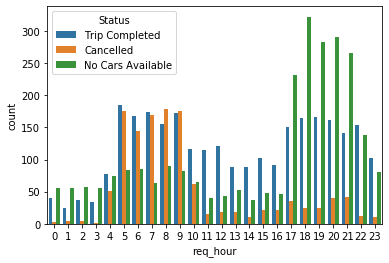

In [28]:
sns.countplot(x="req_hour",data=uber_df,hue="Status")
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


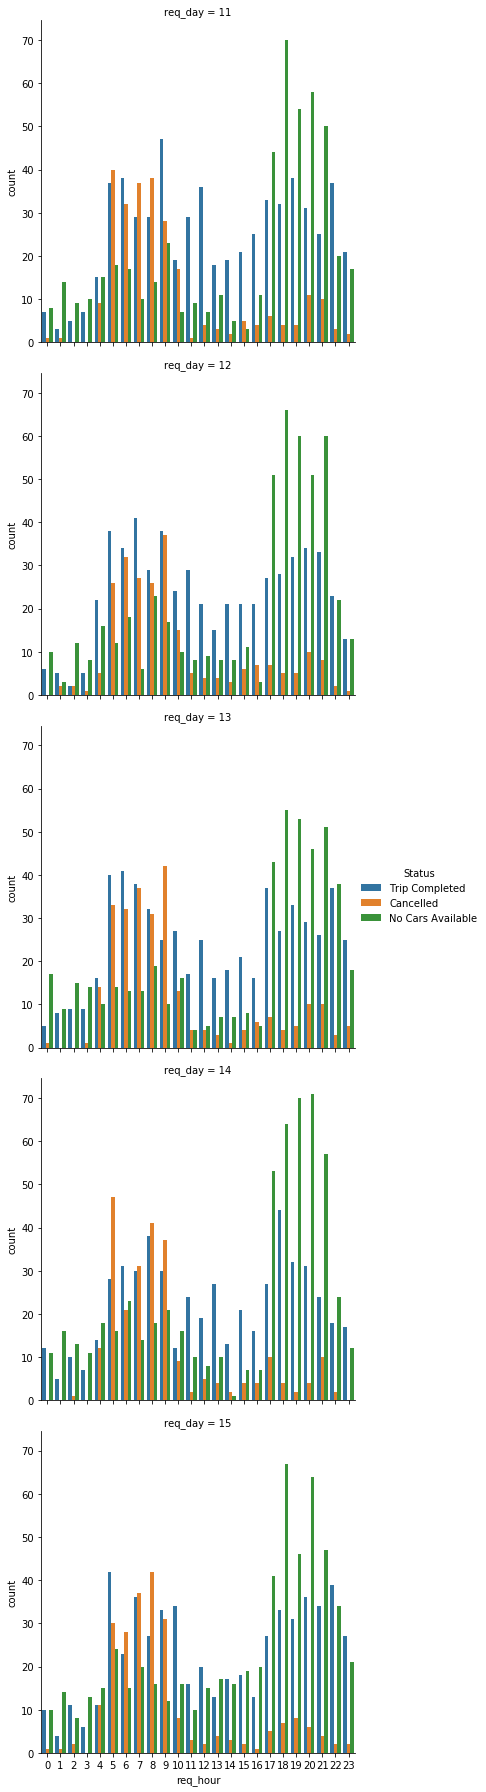

In [30]:
sns.factorplot(x="req_hour",data=uber_df,row="req_day",hue="Status",kind="count")
plt.show()

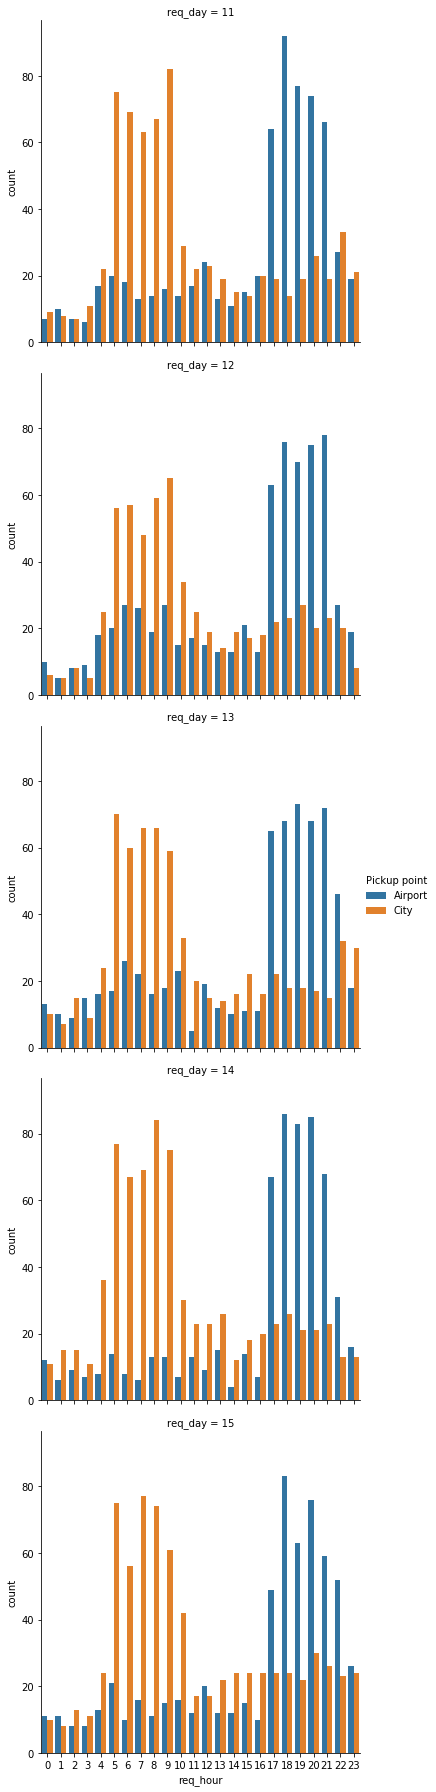

In [31]:
sns.factorplot(x="req_hour",data=uber_df,row="req_day",hue="Pickup point",kind="count")
plt.show()

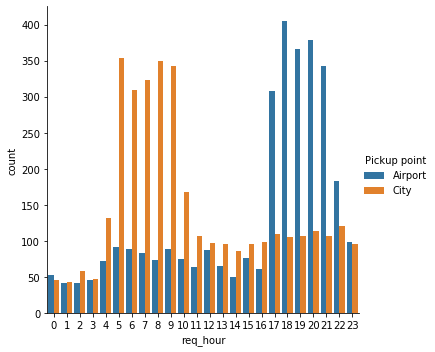

In [32]:
sns.factorplot(x="req_hour",data=uber_df,hue="Pickup point",kind="count")
plt.show()

In [33]:
uber_df

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
Request id,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...
6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15


In [36]:
uber_df['Time_Slot'] = ['Pre_Morning' if x < 5 else 
                        'Morning_Rush' if 5<=x<10 else 
                        'Day_Time' if 10<=x<17 else 
                        'Evening_Rush' if 17<=x<22 else 
                        'Late_Night' 
                        for x in uber_df["req_hour"]]

In [37]:
uber_df

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
Request id,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...
6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night


In [38]:
uber_df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

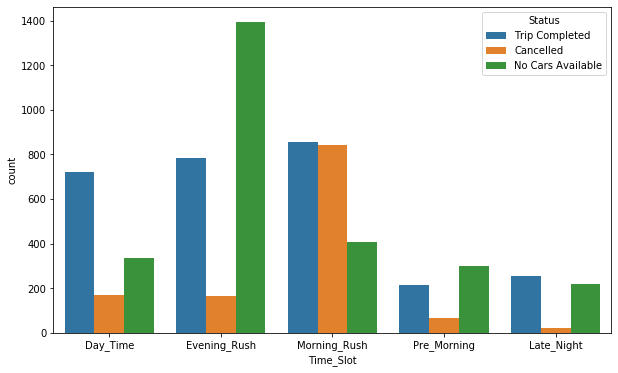

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=uber_df)
plt.show()

#### From Above graph seems Supply Demand issues majorly in Morning Rush hours and Evening Rush hours 

# Supply and demand

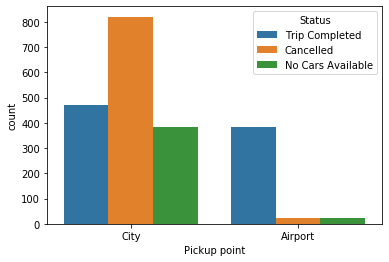

In [43]:
df_morning_rush=uber_df[uber_df['Time_Slot']=='Morning_Rush']
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

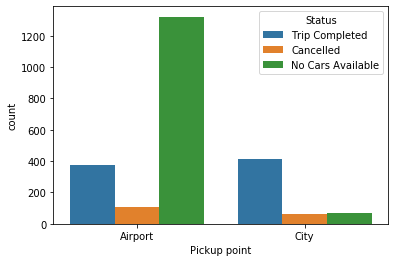

In [42]:
df_evening_rush=uber_df[uber_df['Time_Slot']=='Evening_Rush']
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

#### From Above two graphs it seems there is Supply Demand mismatch in City in Morning Rush hours whereas there is Supply Demand mismatch in Airport location in Evening Rush hours. Moreover we can conclude that in Morning rush hours more trips been cancled by driver whereas in Evening Rush hours there are not enough cars to fulfill the demand. 

## Morning Rush in City

In [107]:
df_supply_chain = df_morning_rush[df_morning_rush['Pickup point'] == 'City']['Status']
df_supply_chain = pd.DataFrame(df_morning_city_rush.value_counts()).sort_index()
df_supply_chain.columns = ['Morning_city_rush']
df_supply_chain

,Morning_city_rush
Cancelled,820
No Cars Available,385
Trip Completed,472


## Evening Rush at Airport 

In [108]:
df_evening_airport_rush = df_evening_rush[df_evening_rush['Pickup point'] == 'Airport']['Status']
df_evening_airport_rush_cnt = pd.DataFrame(df_evening_airport_rush.value_counts()).sort_index()
df_supply_chain['Evening_airport_rush']=df_evening_airport_rush_cnt['Status']
df_supply_chain

,Morning_city_rush,Evening_airport_rush
Cancelled,820,106
No Cars Available,385,1321
Trip Completed,472,373


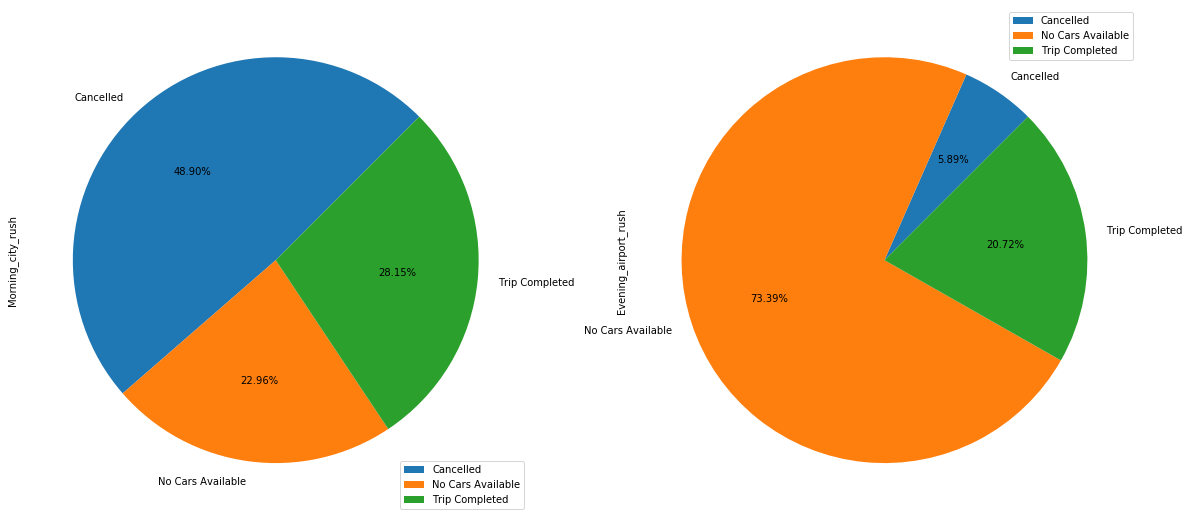

In [111]:
_=df_supply_chain.plot.pie(subplots=True, figsize=(20, 15),autopct='%0.2f%%',
         startangle=45)



## Recommendations
### 1) Since in Morning Rush hour many trips are cancelled Uber should increase driver wages for moring rush hours in City
### 2) There is also, in almost 25% (22.96% to be exact) cases no cars available in morning rush hours, considering majorly drivers denies trip in same period, Uber needs to apply some more intelligent algorithm to route car drivers, such that trip cancellations and cars unavailability both can be minimise.
### 3) To Further minimise morning rush hour trip cancellaion in City, driver wages should be different based on distance need to travel. This needsd further analisys to find out whether trips cancelled for shorter route or longer route, and decide accordingly.
### 4) In Evening seems most of the time cars are not available at airport, this can be compansated by increasing driver's hourly wages for airport trip in Evening.
### 5) In Evening at Airport since cars not availanle Uber can plan out to pay increasing wages per hour to encourage drivers to wait at Airport so that cars unavailability can be reduced.
### 6) Further to reduce unavailability at Airport in Evening, Uber should encourage passangers to share car, as multiple travellers must be landing at same time, this will ensure minimum number of drivers can carry more passangers.